In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
d0 = pd.read_csv('T:/Python/pyradiomics/results/pyradiomics_results_test_20200122.csv')
d0[:3]

,Patient ID,label1,label2,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,...,log-sigma-5-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis,log-sigma-5-0-mm-3D_glszm_LowGrayLevelZoneEmphasis,log-sigma-5-0-mm-3D_glszm_SizeZoneNonUniformity,log-sigma-5-0-mm-3D_glszm_SizeZoneNonUniformityNormalized,log-sigma-5-0-mm-3D_glszm_SmallAreaEmphasis,log-sigma-5-0-mm-3D_glszm_SmallAreaHighGrayLevelEmphasis,log-sigma-5-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis,log-sigma-5-0-mm-3D_glszm_ZoneEntropy,log-sigma-5-0-mm-3D_glszm_ZonePercentage,log-sigma-5-0-mm-3D_glszm_ZoneVariance
0,10197741,2,r,471.222921,762.227516,2.551903e+08,6.234541,143.042882,4.375492,899.079660,...,0.010161,0.007555,159.909091,0.692247,0.857129,1652.310652,0.007266,6.385217,0.770000,0.746275
1,10507209,1,i,250.448028,661.072983,1.209589e+09,6.894289,188.789718,4.059308,1121.600679,...,0.001798,0.001144,676.072593,0.500795,0.735641,3841.952976,0.001083,7.281747,0.616438,1.538765
2,11117389,1,i,295.148564,671.243705,8.196655e+09,6.843573,190.507290,4.527138,1343.446439,...,0.001646,0.000375,3314.662291,0.453194,0.699742,3767.007783,0.000307,7.572145,0.533557,4.091096


In [12]:
label = d0.iloc[:,1]
print(label.shape)
feature = d0.iloc[:,3:]
print(feature.shape)

(151,)
(151, 960)


In [14]:
dz = (feature-feature.mean())/(feature.std()) # z-score
D = pd.concat([label,dz],axis=1,sort=False)
D[:3]

,label1,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,log-sigma-5-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis,log-sigma-5-0-mm-3D_glszm_LowGrayLevelZoneEmphasis,log-sigma-5-0-mm-3D_glszm_SizeZoneNonUniformity,log-sigma-5-0-mm-3D_glszm_SizeZoneNonUniformityNormalized,log-sigma-5-0-mm-3D_glszm_SmallAreaEmphasis,log-sigma-5-0-mm-3D_glszm_SmallAreaHighGrayLevelEmphasis,log-sigma-5-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis,log-sigma-5-0-mm-3D_glszm_ZoneEntropy,log-sigma-5-0-mm-3D_glszm_ZonePercentage,log-sigma-5-0-mm-3D_glszm_ZoneVariance
0,2,0.814530,-0.171685,-0.504665,-0.118701,-0.697698,0.252047,-0.630197,0.142537,-0.639003,...,-0.239383,-0.192927,-0.574099,0.367243,0.464448,-0.537864,-0.170782,-0.185741,0.379452,-0.120043
1,1,-0.406329,-0.398540,-0.266087,0.543199,-0.457825,0.127906,-0.216345,-0.501475,-0.340324,...,-0.311230,-0.433207,-0.218368,-0.706004,-0.654068,-0.015740,-0.409081,0.596773,-0.394546,-0.118620
2,1,-0.159140,-0.375730,1.480527,0.492318,-0.448818,0.311587,0.196252,-0.388795,-0.406901,...,-0.312534,-0.462026,1.600101,-0.972843,-0.984583,-0.033610,-0.438967,0.850240,-0.812294,-0.114034


In [15]:
D_sort = D.sort_values(by=['label1'],axis=0)
D_sort.to_csv('T:/Python/pyradiomics/results/pyradiomics_results_test_20200122_sorted.csv')


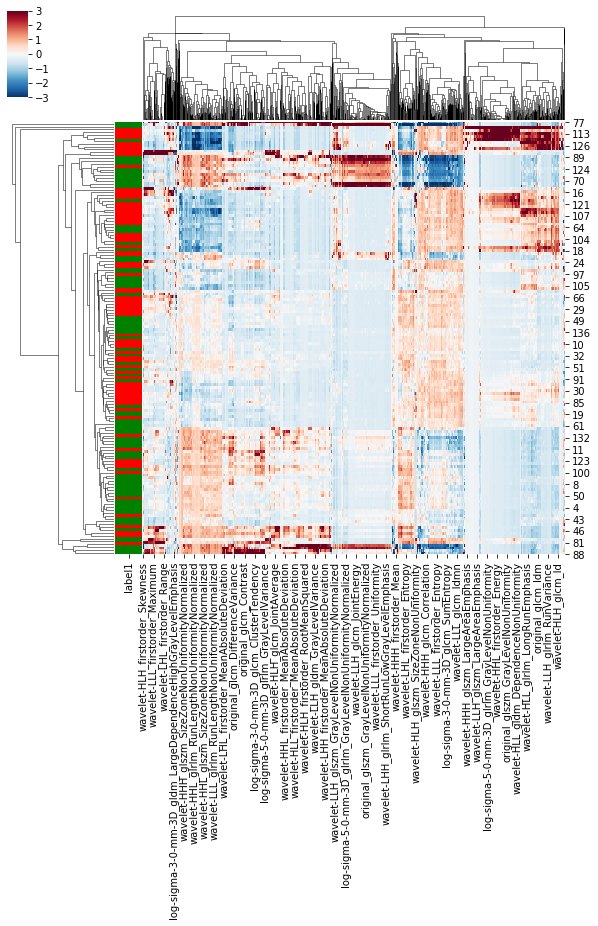

In [17]:
lut = dict(zip(D_sort.iloc[:,0].unique(),"rgb"))
row_colors = D_sort.iloc[:,0].map(lut)
g = sns.clustermap(D_sort.iloc[:,1:],vmin=-3,vmax=3,row_colors=row_colors,row_cluster=True,col_cluster=True,cmap=plt.cm.get_cmap('RdBu_r'))